# Logistic Regression for a Binary Classification of Images

## import library

In [1]:
import sys
sys.path.append('/Users/hong/class/NeuralNetwork/2025/assignment-solution/01')
! python -m pip install --upgrade pip
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
Ignoring tomli: markers 'python_full_version < "3.11.2"' don't match your environment
  Using cached black-22.3.0-py3-none-any.whl.metadata (45 kB)
  Using cached pytest-7.2.2-py3-none-any.whl.metadata (7.8 kB)
  Using cached pytest_subtests-0.11.0-py3-none-any.whl.metadata (6.2 kB)
  Using cached https://download.pytorch.org/whl/cpu/torch-2.8.0-cp313-none-macosx_11_0_arm64.whl.metadata (29 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.23.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.1 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.8.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (7.2 kB)
  Using cached numpy-2.2.6-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata

In [2]:
import os
from pyexpat import model
import torch
from torchvision import transforms
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torch import nn
import matplotlib.pyplot as plt
import statistics

In [3]:
from MyDataset import MyDataset
from MyEval import MyEval
from MyModel import MyModel
from MyOptim import MyOptim
from MyResult import MyResult

## construct dataset 

In [4]:
dataset = MyDataset(path='data', split='train')

## construct dataloader

In [5]:
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, drop_last=True, shuffle=True)

## plot the dataset

In [6]:
iter_data       = iter(dataloader)
(data, label)   = next(iter_data)
print(data.shape, label.shape)
print(data.dtype, label.dtype)

torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.float32 torch.uint8


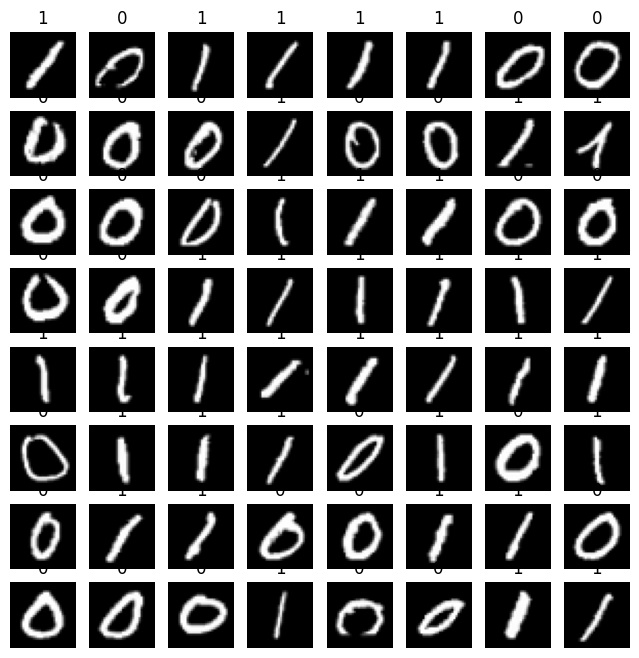

In [7]:
nRow = 8
nCol = 8
plt.figure(figsize=(nRow, nCol))
for i in range(nRow):
    for j in range(nCol):
        idx = nCol * i + j
        plt.subplot(nRow, nCol, idx+1)
        plt.axis('off')
        plt.title(f'{int(label[idx])}')
        plt.imshow(data[idx].squeeze(0), cmap='gray')
plt.show()

## flatten data

In [8]:
vec = nn.Flatten()(data)
print(data.shape, data.dtype)
print(vec.shape, vec.dtype)

torch.Size([64, 1, 32, 32]) torch.float32
torch.Size([64, 1024]) torch.float32


## construct model

In [9]:
shape_vec   = vec.shape
dim_input   = shape_vec[1]
model       = MyModel()
size_model  = model.size()
print('model size =', size_model)
print('dimension of the data =', dim_input)

model size = 1024
dimension of the data = 1024


## train

In [10]:
eval    = MyEval()
optim   = MyOptim(model.weight,0.1)
result  = MyResult()

model.train()
num_epoch = 20

for epoch in range(num_epoch):
    loss_epoch      = []
    accuracy_epoch  = []

    for step, (data, label) in enumerate(tqdm(dataloader)):
        loss_batch      = []
        accuracy_batch  = []
        
        
        vec     = nn.Flatten()(data)
        pred    = model(vec)

        # print(pred.shape, label.shape)
        # print(pred.dtype, label.dtype)
        
        pred        = pred.view(-1)
        label       = label.view(-1).float()

        optim.zero_grad()
        loss_value = optim.Cal_loss(pred, label)
        optim.Cal_grad(pred,label,vec)

        accuracy_value = eval.compute_accuracy(pred, label)
        optim.step()

        # print(pred.shape, label.shape)
        # print(pred.dtype, label.dtype)
        
        loss_batch.append(loss_value.item())
        accuracy_batch.append(accuracy_value.item())

    loss_epoch.append(statistics.mean(loss_batch))
    accuracy_epoch.append(statistics.mean(accuracy_batch))

    print(f'Epoch {epoch+1}/{num_epoch}, Loss: {sum(loss_epoch)/len(loss_epoch)}, Accuracy: {sum(accuracy_epoch)/len(accuracy_epoch)}')

accuracy_train = statistics.mean(accuracy_epoch)
result.add_result('train', accuracy_train)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1/20, Loss: 0.08022391051054001, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 2/20, Loss: 0.0412452258169651, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 3/20, Loss: 0.032150596380233765, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 4/20, Loss: 0.018338102847337723, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 5/20, Loss: 0.014708312228322029, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 6/20, Loss: 0.031729407608509064, Accuracy: 0.984375


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 7/20, Loss: 0.03045760840177536, Accuracy: 0.984375


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 8/20, Loss: 0.014199059456586838, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 9/20, Loss: 0.022094711661338806, Accuracy: 0.984375


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 10/20, Loss: 0.007048392668366432, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 11/20, Loss: 0.05734352022409439, Accuracy: 0.984375


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 12/20, Loss: 0.005138098262250423, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 13/20, Loss: 0.00628481712192297, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 14/20, Loss: 0.006421808153390884, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 15/20, Loss: 0.010030469857156277, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 16/20, Loss: 0.005222206935286522, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 17/20, Loss: 0.00547053012996912, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 18/20, Loss: 0.004044457338750362, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 19/20, Loss: 0.0034175291657447815, Accuracy: 1.0


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 20/20, Loss: 0.003884489880874753, Accuracy: 1.0


## save the trained model

In [11]:
model.eval()
model.save()

## test

In [12]:
eval    = MyEval()
result  = MyResult()
model   = MyModel()
model.load()

batch_size  = 64
dataset     = MyDataset(path='data', split='train')
dataloader  = DataLoader(dataset, batch_size=batch_size, drop_last=False, shuffle=False)

accuracy_batch = []

for step, (data, label) in enumerate(tqdm(dataloader)):
    vec     = nn.Flatten()(data)
    pred    = model(vec)

    pred    = pred.view(-1)
    label   = label.view(-1)
    accuracy_value = eval.compute_accuracy(pred, label)
    accuracy_batch.append(accuracy_value.item())

accuracy_test = statistics.mean(accuracy_batch)
result.add_result('test', accuracy_test)
print(accuracy_test)

  0%|          | 0/16 [00:00<?, ?it/s]

0.9990234375


## save results

In [13]:
result.save()